<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/5%EC%A3%BC%EC%B0%A8/Cursive_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

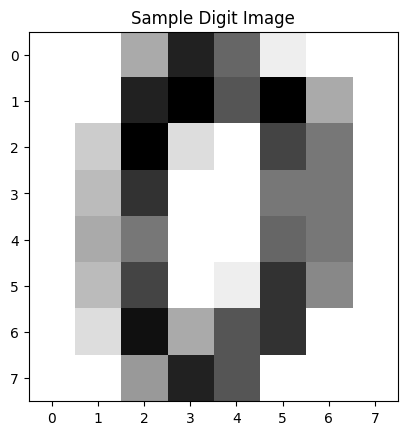

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 혼동 행렬 시각화를 위해 추가
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from keras.utils import to_categorical

# 데이터 셋 로드
digits = datasets.load_digits()

# 첫 번째 이미지 데이터 시각화
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Sample Digit Image")
plt.show()

In [4]:
# 이미지 1차원 배열로 변환

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 스케일링 추가
data = data / 16.0

# 레이블을 원-핫 인코딩 형식으로 변환 (이 부분이 필요한지?)
Y = to_categorical(digits.target)

In [5]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data, Y, test_size=0.2, random_state=42)

In [6]:
# 딥러닝 모델 구축

# 입력층
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# 은닉층 1: 64개의 뉴런과 ReLU 활성화 함수 사용
x = tf.keras.layers.Dense(64, activation='relu')(inputs)

# 은닉층 2: 32개의 뉴런과 ReLU 활성화 함수 사용
x = tf.keras.layers.Dense(32, activation='relu')(x)

# 출력층: 10개의 클래스(0~9)를 분류하기 위해 10개의 뉴런과 softmax 활성화 함수 사용
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

In [8]:
# 모델 학습 방식 설정
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # 최적화 알고리즘
    loss='categorical_crossentropy',                         # 다중 분류를 위한 손실 함수
    metrics=['accuracy']                                     # 평가 지표
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 학습 진행
model_history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, # 전체 데이터셋을 20번 반복하여 학습
)
print("모델 학습 완료.")

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9931 - loss: 0.0504 - val_accuracy: 0.9778 - val_loss: 0.0976
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9946 - loss: 0.0444 - val_accuracy: 0.9722 - val_loss: 0.0988
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.0485 - val_accuracy: 0.9694 - val_loss: 0.1017
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0399 - val_accuracy: 0.9722 - val_loss: 0.1096
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0479 - val_accuracy: 0.9722 - val_loss: 0.0979
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0333 - val_accuracy: 0.9778 - val_loss: 0.0944
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9974 - loss: 0.0289 - val_accuracy: 0.9694 - val_loss: 0.0969
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0303 - val_accuracy: 0.9778 - val_loss:

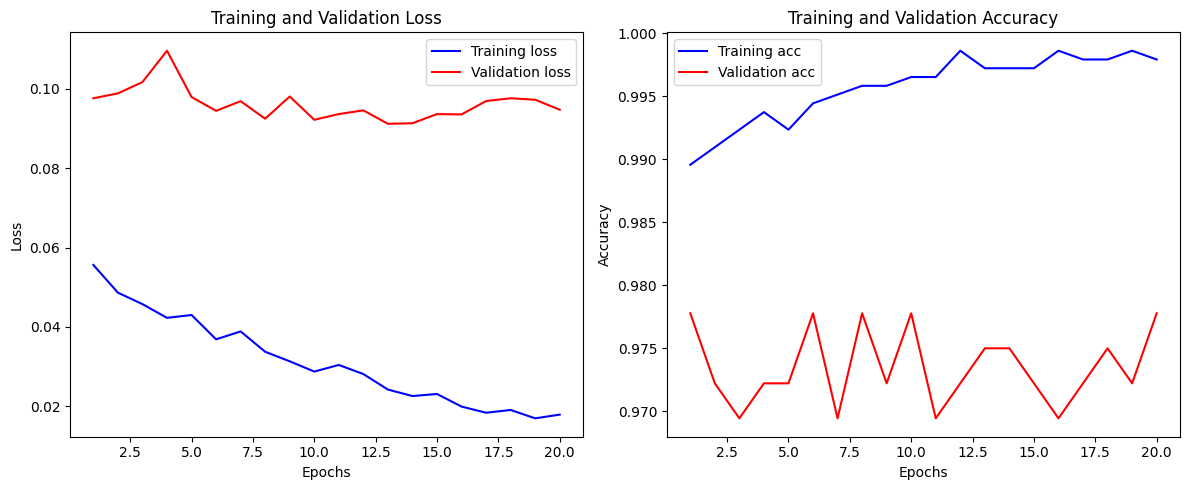

In [12]:
# 모델 평가

# 학습 과정의 손실(loss)과 정확도(accuracy)를 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# 테스트 데이터로 최종 성능 평가
print("\n--- 최종 모델 평가 ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 데이터 정확도: {accuracy:.4f}")


--- 최종 모델 평가 ---
테스트 데이터 정확도: 0.9778


In [14]:
# 모델의 예측값을 계산합니다. (결과는 확률값)
y_pred = model.predict(X_test)

# 확률값을 최종 클래스(0~9)로 변환합니다.
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 분류 리포트 출력 (정밀도, 재현율, F1-점수 등)
print("\n[분류 리포트]")
print(classification_report(y_test_class, y_pred_class))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

[분류 리포트]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      0.97      0.95        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




[혼동 행렬]
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


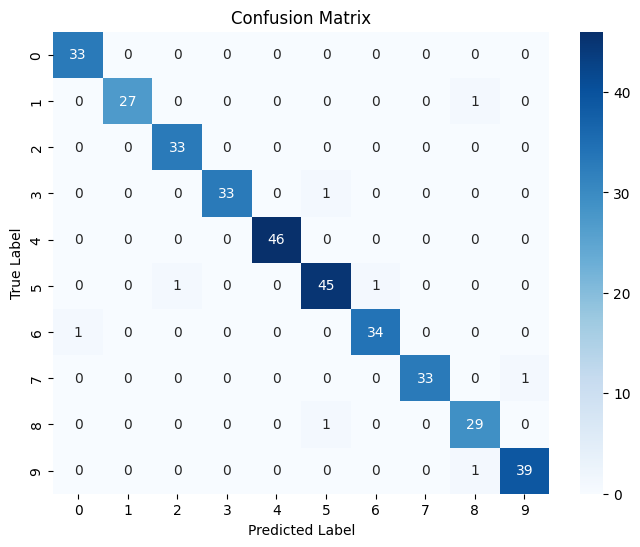

In [15]:
# (추가)
# 혼동 행렬(Confusion Matrix) 계산 및 시각화
print("\n[혼동 행렬]")
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

# 혼동 행렬을 히트맵으로 시각화하여 보기 쉽게 표현
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()